In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from tqdm import tqdm
import plotly.graph_objs as go

In [2]:
BZR = pd.read_csv("BZR_Feat_Imp.csv")
MUTAG = pd.read_csv("MUTAG_Feat_Imp.csv")
IMDB = pd.read_csv("IMDB_Feat_Imp.csv")
NCI1 = pd.read_csv("NCI1_Feat_Imp.csv")
PROTEINS = pd.read_csv("PROTEINS_Feat_Imp.csv")

In [3]:
BZR.head(3)

,selected_features,accuracy_contribution,accuracy_contribution_std
0,feat_page_rank_0,0.787623,0.040407
1,feat_selfwalk_1,0.787541,0.042916
2,feat_lsme_3,0.789426,0.032903


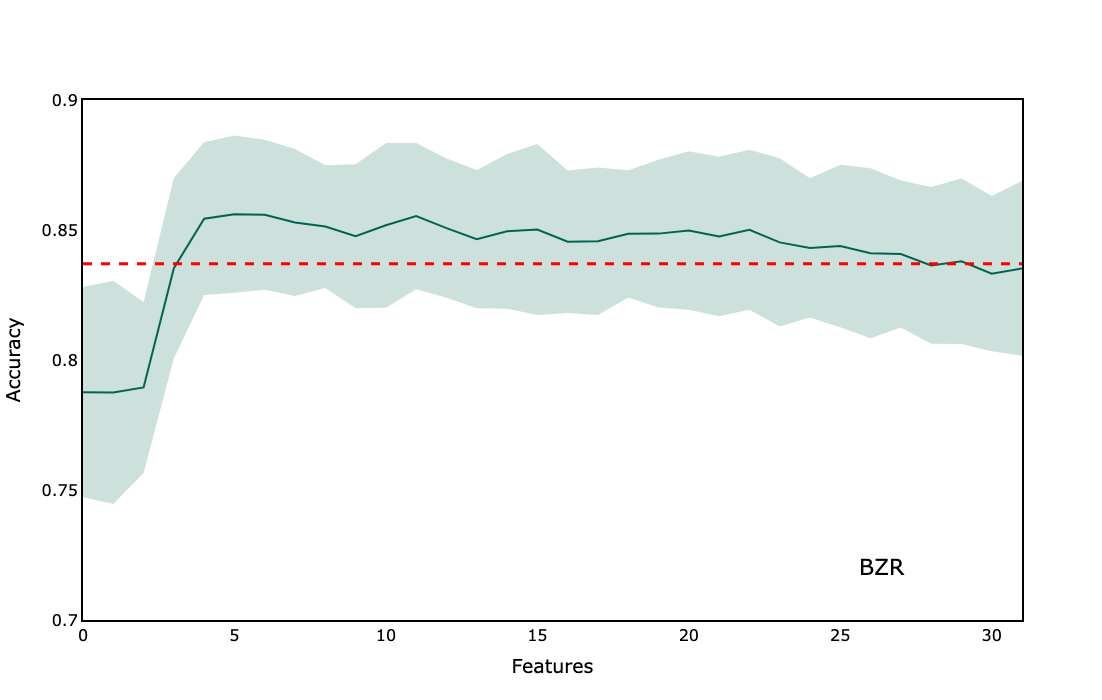

In [13]:

BZR["y_upper"] = BZR["accuracy_contribution"] + BZR["accuracy_contribution_std"]
BZR["y_lower"] = BZR["accuracy_contribution"] - BZR["accuracy_contribution_std"]

x = BZR.index.tolist()
y = BZR["accuracy_contribution"].tolist()

y_upper = BZR["y_upper"].tolist()
y_lower = BZR["y_lower"].tolist()


fig = go.Figure([
    go.Scatter(
        x=x,
        y=y,
        line=dict(color='rgb(0,100,80)'),
        mode='lines'
    ),
    go.Scatter(
        x=x+x[::-1], # x, then x reversed
        y=y_upper+y_lower[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    )
])



# Update figure layout
fig.update_layout(title={'text':'BZR', 'y':0.2, 'x':0.8,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(paper_bgcolor='white')
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(color='black')
fig.update_layout(
    yaxis = dict(
        title = "Accuracy",
        zeroline=True,
        showline = True,
        linecolor = 'black',
        mirror=True,
        linewidth = 2
    ),
    xaxis = dict(
        title = "Features",
        mirror=True,
        zeroline=True,
        showline = True,
        linecolor = 'black',
        linewidth = 2,
    ),
    width=700,
    height=700,
    font=dict(
    size=16,
    color="black")  
)
fig.update_layout(showlegend=False)
fig.update_layout(yaxis_range=[0.7,0.9])
fig.update_xaxes(showgrid=False, gridwidth=0.5, gridcolor='#e3e1e1')
fig.update_yaxes(showgrid=False, gridwidth=0.5, gridcolor='grey')
fig.update_traces(marker_line_color='black', marker_line_width=1.0, opacity=1.0)

fig.add_hline(y=0.837, line_width=3, line_dash="dash", line_color="red")


fig.show()

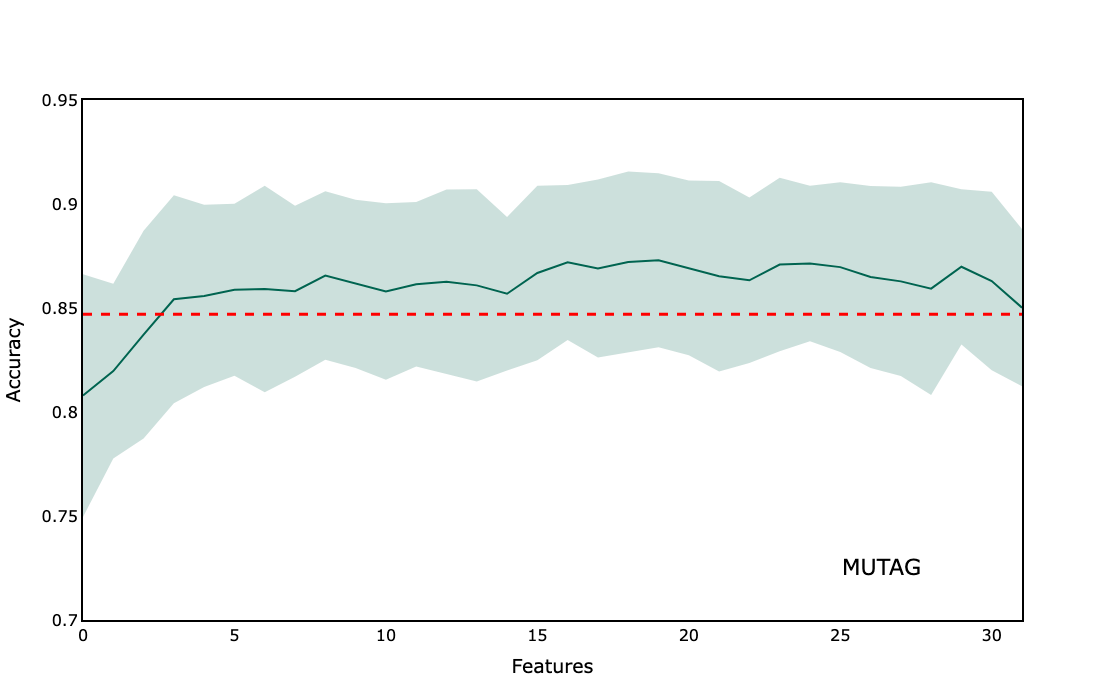

In [14]:

MUTAG["y_upper"] = MUTAG["accuracy_contribution"] + MUTAG["accuracy_contribution_std"]
MUTAG["y_lower"] = MUTAG["accuracy_contribution"] - MUTAG["accuracy_contribution_std"]

x = MUTAG.index.tolist()
y = MUTAG["accuracy_contribution"].tolist()

y_upper = MUTAG["y_upper"].tolist()
y_lower = MUTAG["y_lower"].tolist()


fig = go.Figure([
    go.Scatter(
        x=x,
        y=y,
        line=dict(color='rgb(0,100,80)'),
        mode='lines'
    ),
    go.Scatter(
        x=x+x[::-1], # x, then x reversed
        y=y_upper+y_lower[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    )
])



# Update figure layout
fig.update_layout(title={'text':'MUTAG', 'y':0.2, 'x':0.8,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(paper_bgcolor='white')
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(color='black')
fig.update_layout(
    yaxis = dict(
        title = "Accuracy",
        zeroline=True,
        showline = True,
        linecolor = 'black',
        mirror=True,
        linewidth = 2
    ),
    xaxis = dict(
        title = "Features",
        mirror=True,
        zeroline=True,
        showline = True,
        linecolor = 'black',
        linewidth = 2,
    ),
    width=700,
    height=700,
    font=dict(
    size=16,
    color="black")  
)
fig.update_layout(showlegend=False)
fig.update_layout(yaxis_range=[0.7,0.95])
fig.update_xaxes(showgrid=False, gridwidth=0.5, gridcolor='#e3e1e1')
fig.update_yaxes(showgrid=False, gridwidth=0.5, gridcolor='grey')
fig.update_traces(marker_line_color='black', marker_line_width=1.0, opacity=1.0)

fig.add_hline(y=0.847, line_width=3, line_dash="dash", line_color="red")


fig.show()

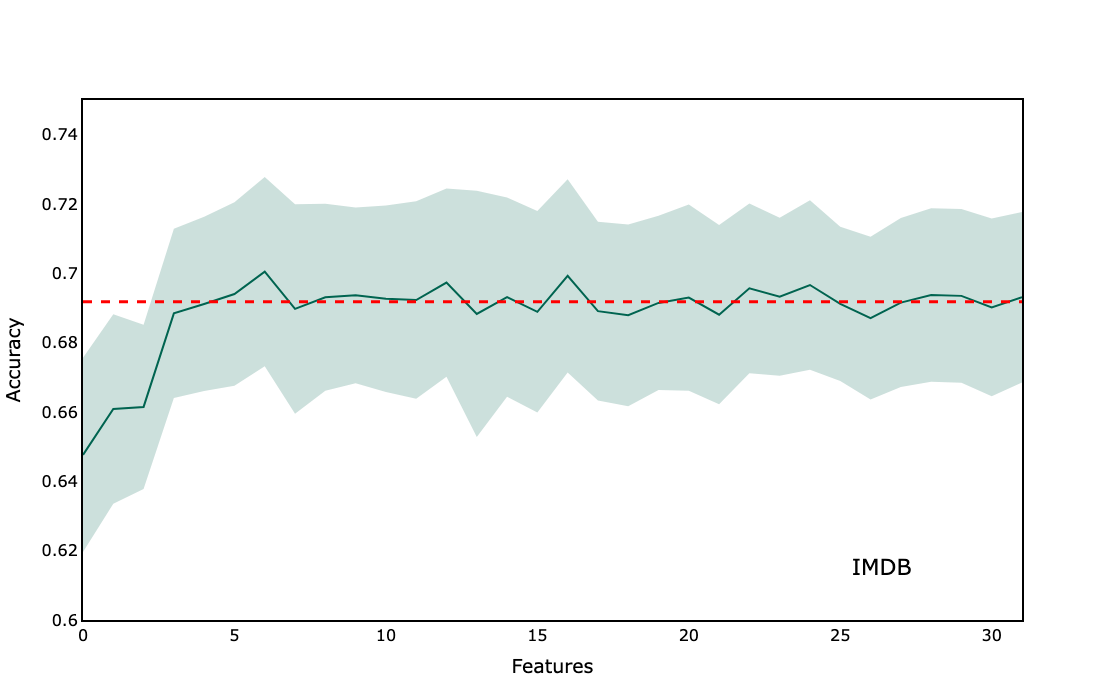

In [15]:

IMDB["y_upper"] = IMDB["accuracy_contribution"] + IMDB["accuracy_contribution_std"]
IMDB["y_lower"] = IMDB["accuracy_contribution"] - IMDB["accuracy_contribution_std"]

x = IMDB.index.tolist()
y = IMDB["accuracy_contribution"].tolist()

y_upper = IMDB["y_upper"].tolist()
y_lower = IMDB["y_lower"].tolist()


fig = go.Figure([
    go.Scatter(
        x=x,
        y=y,
        line=dict(color='rgb(0,100,80)'),
        mode='lines'
    ),
    go.Scatter(
        x=x+x[::-1], # x, then x reversed
        y=y_upper+y_lower[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    )
])



# Update figure layout
fig.update_layout(title={'text':'IMDB', 'y':0.2, 'x':0.8,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(paper_bgcolor='white')
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(color='black')
fig.update_layout(
    yaxis = dict(
        title = "Accuracy",
        zeroline=True,
        showline = True,
        linecolor = 'black',
        mirror=True,
        linewidth = 2
    ),
    xaxis = dict(
        title = "Features",
        mirror=True,
        zeroline=True,
        showline = True,
        linecolor = 'black',
        linewidth = 2,
    ),
    width=700,
    height=700,
    font=dict(
    size=16,
    color="black")  
)
fig.update_layout(showlegend=False)
fig.update_layout(yaxis_range=[0.6,0.75])
fig.update_xaxes(showgrid=False, gridwidth=0.5, gridcolor='#e3e1e1')
fig.update_yaxes(showgrid=False, gridwidth=0.5, gridcolor='grey')
fig.update_traces(marker_line_color='black', marker_line_width=1.0, opacity=1.0)

fig.add_hline(y=0.6918, line_width=3, line_dash="dash", line_color="red")


fig.show()

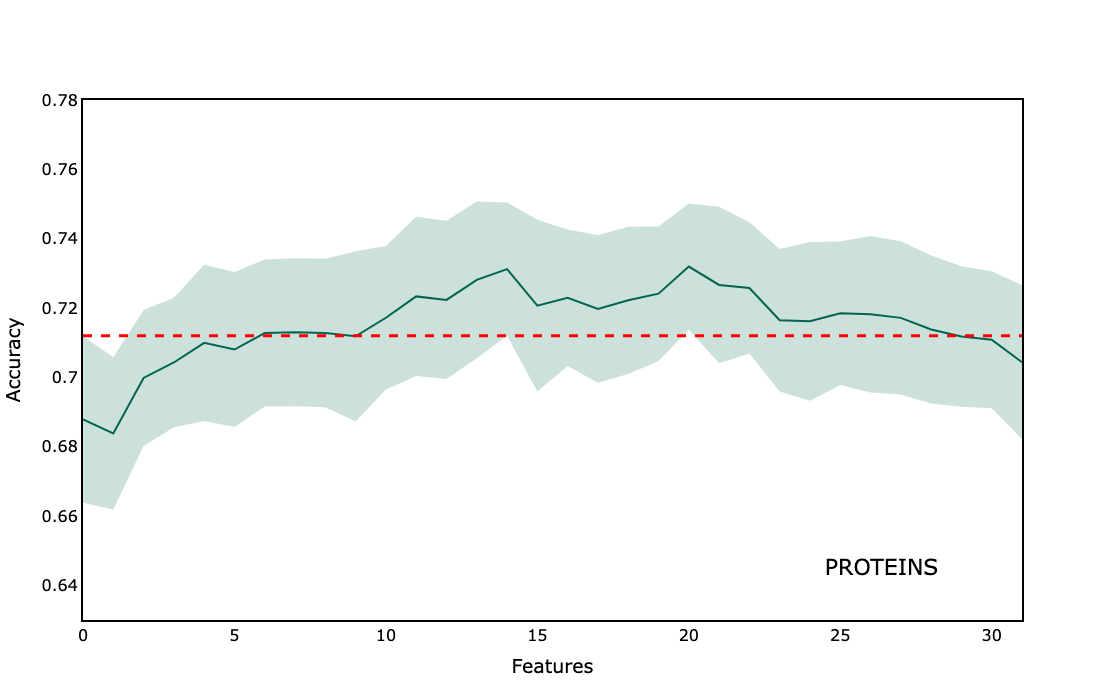

In [17]:

PROTEINS["y_upper"] = PROTEINS["accuracy_contribution"] + PROTEINS["accuracy_contribution_std"]
PROTEINS["y_lower"] = PROTEINS["accuracy_contribution"] - PROTEINS["accuracy_contribution_std"]

x = PROTEINS.index.tolist()
y = PROTEINS["accuracy_contribution"].tolist()

y_upper = PROTEINS["y_upper"].tolist()
y_lower = PROTEINS["y_lower"].tolist()


fig = go.Figure([
    go.Scatter(
        x=x,
        y=y,
        line=dict(color='rgb(0,100,80)'),
        mode='lines'
    ),
    go.Scatter(
        x=x+x[::-1], # x, then x reversed
        y=y_upper+y_lower[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    )
])



# Update figure layout
fig.update_layout(title={'text':'PROTEINS', 'y':0.2, 'x':0.8,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(paper_bgcolor='white')
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(color='black')
fig.update_layout(
    yaxis = dict(
        title = "Accuracy",
        zeroline=True,
        showline = True,
        linecolor = 'black',
        mirror=True,
        linewidth = 2
    ),
    xaxis = dict(
        title = "Features",
        mirror=True,
        zeroline=True,
        showline = True,
        linecolor = 'black',
        linewidth = 2,
    ),
    width=700,
    height=700,
    font=dict(
    size=16,
    color="black")  
)
fig.update_layout(showlegend=False)
fig.update_layout(yaxis_range=[0.63,0.78])
fig.update_xaxes(showgrid=False, gridwidth=0.5, gridcolor='#e3e1e1')
fig.update_yaxes(showgrid=False, gridwidth=0.5, gridcolor='grey')
fig.update_traces(marker_line_color='black', marker_line_width=1.0, opacity=1.0)

fig.add_hline(y=0.712, line_width=3, line_dash="dash", line_color="red")


fig.show()

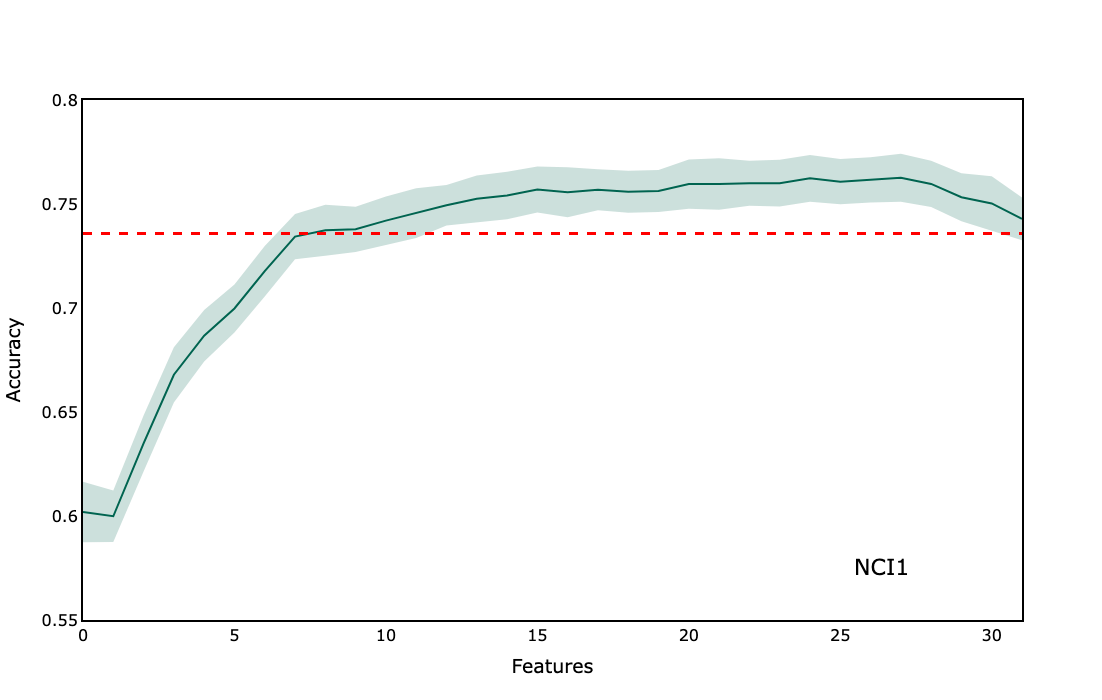

In [18]:

NCI1["y_upper"] = NCI1["accuracy_contribution"] + NCI1["accuracy_contribution_std"]
NCI1["y_lower"] = NCI1["accuracy_contribution"] - NCI1["accuracy_contribution_std"]

x = NCI1.index.tolist()
y = NCI1["accuracy_contribution"].tolist()

y_upper = NCI1["y_upper"].tolist()
y_lower = NCI1["y_lower"].tolist()


fig = go.Figure([
    go.Scatter(
        x=x,
        y=y,
        line=dict(color='rgb(0,100,80)'),
        mode='lines'
    ),
    go.Scatter(
        x=x+x[::-1], # x, then x reversed
        y=y_upper+y_lower[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    )
])



# Update figure layout
fig.update_layout(title={'text':'NCI1', 'y':0.2, 'x':0.8,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(paper_bgcolor='white')
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(color='black')
fig.update_layout(
    yaxis = dict(
        title = "Accuracy",
        zeroline=True,
        showline = True,
        linecolor = 'black',
        mirror=True,
        linewidth = 2
    ),
    xaxis = dict(
        title = "Features",
        mirror=True,
        zeroline=True,
        showline = True,
        linecolor = 'black',
        linewidth = 2,
    ),
    width=700,
    height=700,
    font=dict(
    size=16,
    color="black")  
)
fig.update_layout(showlegend=False)
fig.update_layout(yaxis_range=[0.55,0.8])
fig.update_xaxes(showgrid=False, gridwidth=0.5, gridcolor='#e3e1e1')
fig.update_yaxes(showgrid=False, gridwidth=0.5, gridcolor='grey')
fig.update_traces(marker_line_color='black', marker_line_width=1.0, opacity=1.0)

fig.add_hline(y=0.7358, line_width=3, line_dash="dash", line_color="red")


fig.show()